### State Farm Interview Exercise 2

Earlier this year, I had applied to State Farm for a data scientist position. I made some rookie mistakes and was pretty unprepared. I've learned a lot since then, and looking to do a better job this time. Hence this being named exercise 2. 

Since I've done something like this once, my notes will not only cover what I'm doing but, where important, what I'm doing differently than last time, in case anyone's reviewing my prior work.

In [1]:
#i'll start with imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#i want pyplot graphs to show up in the notebook and not in another window
%matplotlib inline

In [2]:
#read in the train data
df = pd.read_csv("/Users/Ryan/Desktop/Programming/State Farm/Round 2/exercise_04_train.csv")

#check header
df.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-17.933519,6.559220,2.422468,-27.737392,-12.080601,-3.892934,1.067466,0.935953,10.912007,1.107144,...,11.107047,0.093337,asia,0.421524,35.259947,8.994318,-21.000182,-0.686588,2.949106,1
1,-37.214754,10.774930,5.404072,21.354738,0.612690,-3.093533,6.161558,-0.972156,-5.222169,0.384969,...,-1.991846,15.666187,asia,-0.132764,-1.192563,3.885024,-37.886523,-7.730392,-1.107330,0
2,0.330441,-19.609972,-1.331804,-15.153892,19.710240,19.077300,-1.747110,0.545570,-1.464609,3.670570,...,17.132840,-5.333012,asia,1.432308,-3.435427,-1.133450,7.426099,-5.945534,1.316312,0
3,-13.709765,-8.011390,-1.536483,23.129497,27.880879,20.573991,-1.617689,4.129694,1.139928,2.912838,...,12.292136,4.177925,asia,0.733069,4.372964,15.529931,29.712153,2.240740,0.477195,0
4,-4.202598,7.076210,8.881550,23.600777,26.232164,-14.462320,3.231193,-0.069364,-7.310536,-2.268700,...,6.218743,8.715709,asia,-0.977502,-30.085932,-8.244312,66.540331,-3.478195,-2.869702,1


In [3]:
#look at standard metrics for each feature
#since theres 9 independent variables i need more columns displayed
pd.set_option('display.max_rows', None)
pd.set_option('expand_frame_repr', True)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,39989.000000,39989.000000,39993.000000,39991.000000,39992.000000,39989.000000,39993.000000,39988.000000,39996.000000,39992.000000,39990.000000,39994.000000,39988.000000,39989.000000,39997.000000,39994.000000,39993.000000,39990.000000,39987.000000,39993.000000,39995.000000,39985.000000,39993.000000,39994.000000,39988.000000,39992.000000,39991.000000,39996.000000,39991.000000,39995.000000,39995.000000,39993.000000,39994.000000,39991.000000,39992,39989,39994.000000,39995.000000,39995.000000,39992.000000,39992.000000,39994,39987.000000,39998.000000,39996.000000,39995,39990.000000,39995.000000,39992.000000,39997.000000,39993.000000,39989.000000,39990.000000,39995.000000,39994.000000,39984.000000,39989.000000,39993.000000,39992.000000,39992.000000,39989.000000,39994.000000,39988.000000,39987.000000,39994.000000,39988.000000,39991.000000,39994.000000,39989,39989.000000,39996.000000,39995.000000,39990.000000,39992.000000,39993.000000,39990.000000,39989.000000,39993.000000,39991.000000,39993.000000,39993.000000,39996.000000,39993.000000,39995.000000,39997.000000,39988.000000,39991.000000,39993.000000,39996.000000,39989.000000,39995.000000,39995.000000,39992.000000,39993,39990.000000,39992.000000,39985.000000,39991.000000,39995.000000,39990.000000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN,37813,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,volkswagon,wed,NaN,NaN,NaN,NaN,NaN,$-369.55,NaN,NaN,NaN,0.01%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12557,14829,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,9577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.159970,-3.568111,0.223336,-1.742588,0.079437,-0.535399,0.015483,-0.011955,-3.055506,-0.023167,5.229377,0.006259,-0.426662,-0.019274,-0.025679,-0.033417,-0.043597,-0.044177,6.636466,0.222461,5.341449,1.377665,-0.883098,-0.028842,0.002226,0.104405,0.029357,7.730837,-0.023996,-0.002010,-0.007698,-0.001832,0.033191,-7.428222,NaN,NaN,0.004438,1.430897,0.008598,0.023822,0.998854,NaN,-3.059808,-0.084158,-22.454989,NaN,0.011576,-0.060253,0.061199,0.055439,1.201845,-5.910209,-0.007552,0.279034,-0.046812,0.082052,-1.633534,-0.013266,-0.394664,0.006131,0.053410,0.019217,-0.054215,-4.586934,-0.000774,-0.062551,-0.133188,-0.001862,NaN,-10.367437,6.379378,-0.009934,-6.207061,-3.084835,0.179696,4.514903,0.007223,-0.115078,-2.881630,0.140952,-0.056844,-0.012174,-0.010540,1.099889,-0.056204,-0.838174,0.014725,-0.004057,0.000625,0.004848,-7.472520,-0.026534,0.016619,NaN,-0.000084,0.054600,-0.459762,-4.925135,0.033761,0.120155,0.203000
std,29.098537,17.186748,5.237987,36.601044,21.179065,13.602122,4.110412,2.423051,13.450495,2.472008,28.344032,1.526521,1.705495,8.550818,8.491004,

In [55]:
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34    object 
x35    object 
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x54    float64
x55    float64
x56    float64
x57    float64
x58    float64
x59    float64
x60    float64
x61    float64
x62    float64
x63    float64
x64    float64
x65    float64
x66    flo

### EDA

I've loaded the data, so it's time to do some EDA. This is going to be a large section.

Now that the data is in, here's a couple of quick things I noticed already: 
- There's 40000 rows in y, and 39985 or more in the other columns, so there's very little missing data. 
- It's mostly numeric variables, with 4 categorical variables
- There's two other variables I need to fix, one percentage and one accounting format

Next steps (not necessarily in order):
- Fixing variables
- Do some visualizations
- Do some distributions to understand statistical measures of the data
- Calculate values for missing data (or just delete it)
- Feature engineering

And that will conclude the EDA section, where I'll continue into Model Selection.

In [62]:
#real quick i want to check the balance between the classes in the dependent variable y
df['y'].value_counts()

0    31880
1    8120 
Name: y, dtype: int64

In [7]:
#that's only about 20% of the data for 1, 80% or so for 0. interesting. i'll have to deal with this imbalance later.
#i'll look at the categorical variables real quick: x34, x35, x68, x93
df.x34.unique()

array(['bmw', 'Toyota', 'tesla', 'chrystler', 'volkswagon', 'Honda',
       'nissan', 'ford', 'mercades', 'chevrolet', nan], dtype=object)

In [4]:
df['x34'].value_counts()

volkswagon    12557
Toyota        10922
bmw           7288 
Honda         5195 
tesla         2286 
chrystler     1209 
nissan        339  
ford          160  
mercades      26   
chevrolet     10   
Name: x34, dtype: int64

In [8]:
#x34 looks like makes of cars, next is x35
df.x35.unique()

array(['thur', 'wednesday', 'thurday', 'wed', 'tuesday', 'friday', 'fri',
       'monday', nan], dtype=object)

In [9]:
#x35 is days of the week, with errors. need to fix these. next is x68
df.x68.unique()

array(['sept.', 'July', 'Apr', 'Aug', 'May', 'Jun', 'Mar', 'Oct', 'Nov',
       'Feb', 'Dev', nan, 'January'], dtype=object)

In [5]:
df['x68'].value_counts()

July       11146
Jun        9289 
Aug        8115 
May        4833 
sept.      3441 
Apr        1638 
Oct        886  
Mar        397  
Nov        160  
Feb        52   
Dev        20   
January    12   
Name: x68, dtype: int64

In [10]:
#x68 is months of the year, though not standardized. I'll probably fix these so it looks better in a graph
#next is x93 to finish
df.x93.unique()

array(['asia', 'america', 'euorpe', nan], dtype=object)

In [6]:
df['x93'].value_counts()

asia       35434
america    3136 
euorpe     1423 
Name: x93, dtype: int64

In [11]:
#these look like regions of the world
#i'm gonna look at x45 before i convert it, since theres only 10 values?
#i'm already guessing i'm gonna do some feature engineering using x45 because what is it a percent of?
df.x45.unique()

array(['-0.01%', '0.0%', '0.01%', '-0.0%', '0.02%', '-0.02%', '-0.03%',
       '0.03%', '-0.04%', nan, '0.04%'], dtype=object)

Now that I have some idea of what the data is, I'm going to clean the categorical variables and fix x41 and x45 before I go any farther.

In [4]:
#x41 is accouting format, i'll strip the $ out and then it'll be number, then i need to make it floats
#so strip $, convert to float
df.loc[:,'x41'] = df.loc[:,'x41'].str.replace('$','').astype(float)

In [64]:
#check if it worked
df['x41'].describe()

count    39994.000000
mean    -0.883222    
std      998.419197  
min     -4496.460000 
25%     -669.350000  
50%      5.120000    
75%      673.735000  
max      4327.530000 
Name: x41, dtype: float64

In [5]:
#that worked, next is x45
#just to make a note above, there's only values ranging from -0.04 to 0.04 in this column. interesting
df.loc[:,'x45'] = df.loc[:,'x45'].str.rstrip('%').astype(float) / 100.0
#check if it worked all in one cell
df['x45'].describe()

count    3.999500e+04
mean    -9.501188e-08
std      1.042023e-04
min     -4.000000e-04
25%     -1.000000e-04
50%      0.000000e+00
75%      1.000000e-04
max      4.000000e-04
Name: x45, dtype: float64

In [6]:
#now i'm gonna fix the days of the week in x35
df.x35.replace(['wed','thur','fri','thurday'],['wednesday','thursday','friday','thursday'], inplace=True)
df.x35.unique()

array(['thursday', 'wednesday', 'tuesday', 'friday', 'monday', nan],
      dtype=object)

In [11]:
df['x35'].value_counts()

wednesday    20756
thursday     17726
tuesday      898  
friday       550  
monday       59   
Name: x35, dtype: int64

In [7]:
#why is it only weekdays? interesting
#also wedenesday is a huge part of this variable. interesting
#i guess i say interesting when there's something i want to remember for later
#anyway last time i didnt fix the regions, but i am this time
#i didnt do many visualizations last time, and that was a big miss in my opinion
#how can i really tune a model or know which to pick without really understanding the data?
#understanding requires making and looking at visualizations
df.x93.replace(['euorpe'],['europe'], inplace=True)
df.x93.unique()

array(['asia', 'america', 'europe', nan], dtype=object)

In [8]:
#i skipped this originally but had to restart the kernel and decided to clean it up
df.x68.replace(['sept.', 'Dev', 'January', 'July'],['Sep', 'Dec', 'Jan', 'Jul'], inplace=True)
df.x68.unique()

array(['Sep', 'Jul', 'Apr', 'Aug', 'May', 'Jun', 'Mar', 'Oct', 'Nov',
       'Feb', 'Dec', nan, 'Jan'], dtype=object)

Now that I've fixed those, I want to look at visualizations of the variables before I decide what to do with the NaN values. There's only a small amount of missing data, so deleting it probably isn't a problem. I want to make sure the value I impute fits the distribution. This will also help me pick which model to deploy, as different models have different tolerances for statistical bias, variance, etc.

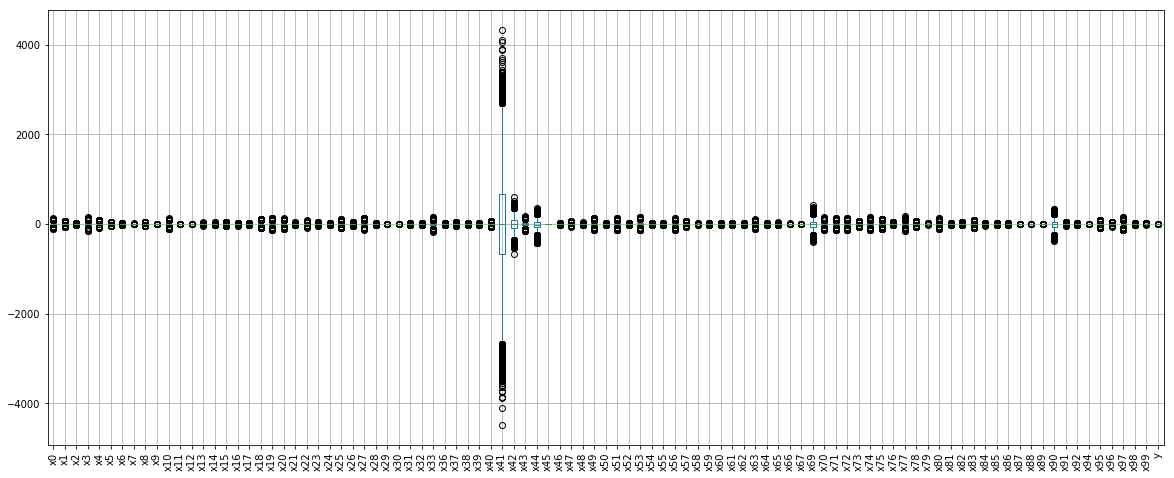

In [36]:
#i'll start with a simple boxplot of all variables
plt.rcParams['figure.figsize'] = [20, 8]

df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [37]:
#its hard to read with x41 so I'm gonna remove that (and y) and plot the rest
df2 = df.copy()
df2.drop(['x41', 'y'], axis=1, inplace=True)

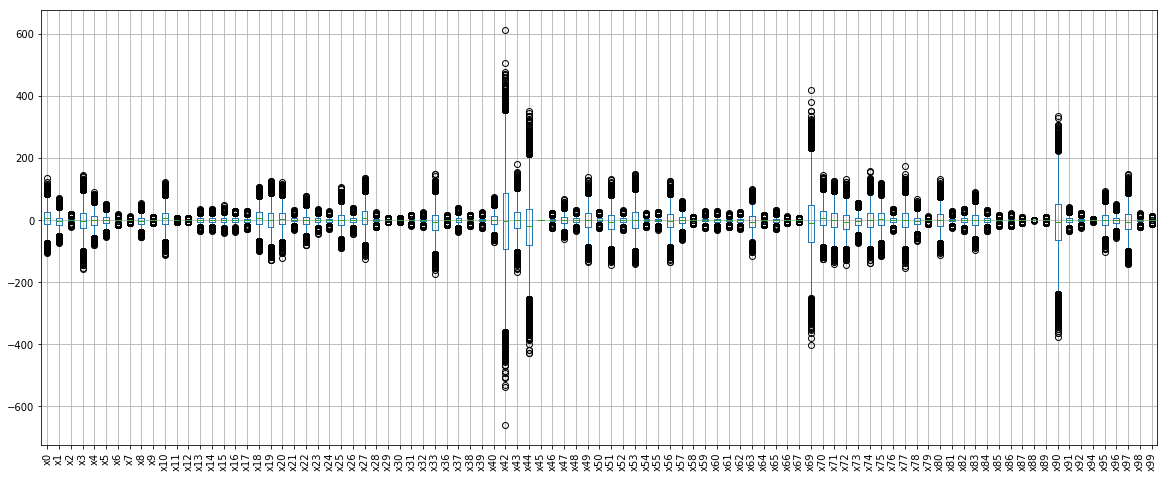

In [23]:
#plot it, hopefully it looks better
df2.boxplot()
plt.xticks(rotation=90)
plt.show()

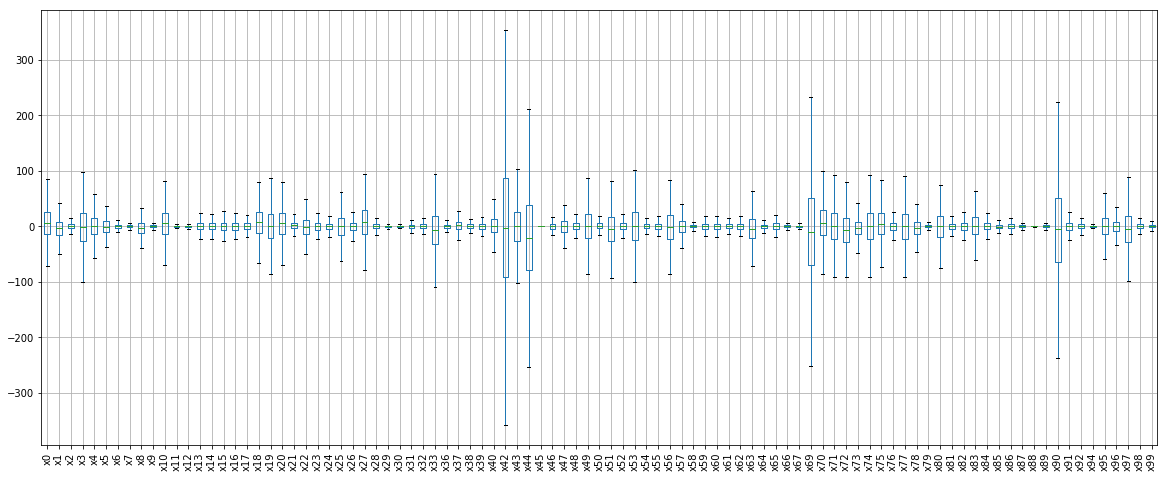

In [38]:
#let's try it without outliers, this will help with feature engineering later
df2.boxplot(showfliers=False)
plt.xticks(rotation=90)
plt.show()

We can see that all the variables are centered near 0 and not really skewed. We got that from df.describe() as well, but it's good to see it in a chart. Removing the outliers is interesting. We see that the bands for the quartiles are pretty narrow for most variables, with some wide dispersion of data at the extremes. Taking away the outliers makes this even more clear. 

I will have to look at this for feature engineering. I used the matplotlib.pyplot function "showfliers" to remove them. For matplotlib, according to the documentation, the whiskers end at Q1-1.5(IQR) and Q3+1.5(IQR), where IQR is the range (Q3-Q1) by default. For a normal distribution this would cover 99.3% of values, but these are not exactly normal, I don't think. Still, it provides a good baseline of outliers to remove, so I'll use that later.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f07e860>,
      dtype=object)

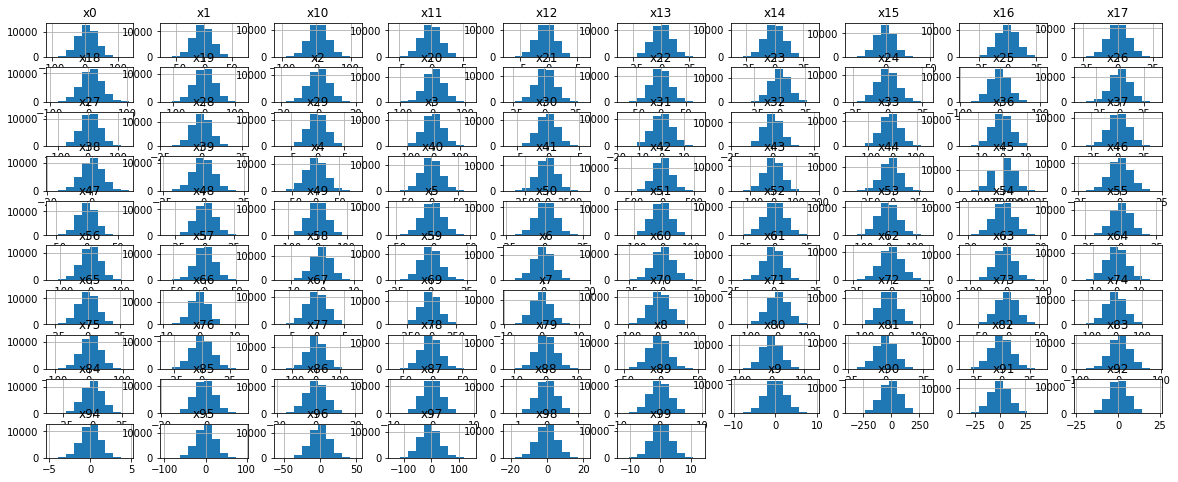

In [47]:
#its easy to see that they're all roughly centered at 0 and not really skewed
#this is also present in the df.describe() stats but it's also good to actually see it
#i'm gonna run histograms for all of them to get that looked at as well

#make a copy and drop y
df2 = df.copy()
df2.drop(['y'], axis=1, inplace=True)

df2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128e93a58>]],
      dtype=object)

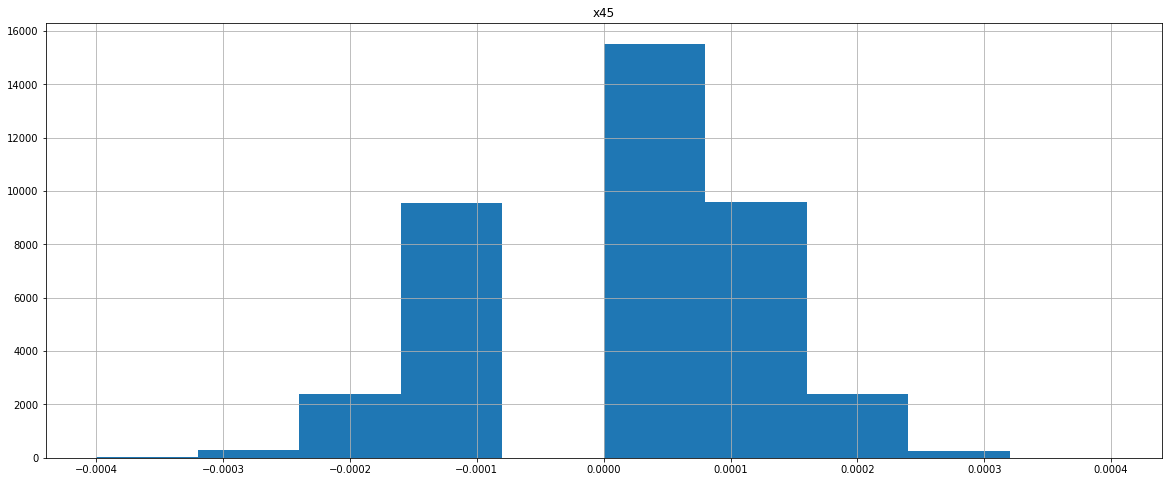

In [49]:
#x45 looks weird, i'll look at that one bigger. it's the percentage one, so there may be no -1s or something
df2.hist(column='x45')

In [50]:
#it looks like it's the way it does the bins, i'll check the values
df['x45'].value_counts()

 0.0000    15524
 0.0001    9577 
-0.0001    9569 
 0.0002    2390 
-0.0002    2374 
-0.0003    279  
 0.0003    257  
-0.0004    14   
 0.0004    11   
Name: x45, dtype: int64

In [52]:
#that looks fine, there's data for each value, so i'll move on
#now i'll do a correlation matrix to check for multicollinearity
corr = df2.corr()
corr.style.background_gradient().set_precision(2)

So here's where I'm at now, in EDA:
- Variables are all relatively normally distributed.
- Variable distributions vary substantially, so some models may require normalization/scaling.
- Multicollinearity is not a problem. Highest correlation between variables is .38, which gives a variance inflation factor of 1.17.
- Still need to deal with missing values, so I'll do that next

The question is still, what to do for missing values?

There's a couple of options. I could simply delete them, I could replace them with some statistical value for the column (mean, median, etc.), or I could use an algorithm to calculate the value. 
Last time, I simply deleted them, and still got a good result. The thing I lacked was a thorough explanation for why. With my statistical approach to this time, I'll explain the choice in detail.

First, the nature of the missing data can be assumed to be missing at random. I'm not sure if it's completely at random, because there may have been some intent in the deletion, but it's not due to some error in sampling or some meaning to the data itself. However, in a real dataset, I wouldn't know this, so I'm not going to delete it under the assumption that I wouldn't normally. 

Imputation and replacement with a statistic are still available. The rows containing missing data are less than 0.5% of the dataset, so they'll likely have little effect on the overall result, but it's important to do this thoroughly.

In [57]:
#i'm going to compare mean or median
#i'll put them next to each other with min and max to get scale of the column for reference
#this info is in df.describe(), but that's a pain to look at for 100 variables
df.agg(['mean','median', 'min','max'])

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
mean,6.159970,-3.568111,0.223336,-1.742588,0.079437,-0.535399,0.015483,-0.011955,-3.055506,-0.023167,5.229377,0.006259,-0.426662,-0.019274,-0.025679,-0.033417,-0.043597,-0.044177,6.636466,0.222461,5.341449,1.377665,-0.883098,-0.028842,0.002226,0.104405,0.029357,7.730837,-0.023996,-0.002010,-0.007698,-0.001832,0.033191,-7.428222,0.004438,1.430897,0.008598,0.023822,0.998854,-0.883222,-3.059808,-0.084158,-22.454989,-9.501188e-08,0.011576,-0.060253,0.061199,0.055439,1.201845,-5.910209,-0.007552,0.279034,-0.046812,0.082052,-1.633534,-0.013266,-0.394664,0.006131,0.053410,0.019217,-0.054215,-4.586934,-0.000774,-0.062551,-0.133188,-0.001862,-10.367437,6.379378,-0.009934,-6.207061,-3.084835,0.179696,4.514903,0.007223,-0.115078,-2.881630,0.140952,-0.056844,-0.012174,-0.010540,1.099889,-0.056204,-0.838174,0.014725,-0.004057,0.000625,0.004848,-7.472520,-0.026534,0.016619,-0.000084,0.054600,-0.459762,-4.925135,0.033761,0.120155,0.203
median,6.247370,-3.660536,0.264994,-1.638876,0.113879,-0.530463,0.015259,-0.002569,-3.069374,-0.039400,5.307517,0.001018,-0.427867,-0.061979,-0.033148,-0.015862,-0.029955,-0.031615,6.775444,-0.058365,5.184247,1.391436,-1.099724,0.063685,0.016453,-0.128617,0.030500,7.749839,-0.041025,0.013282,-0.012300,0.011587,-0.005223,-7.417044,0.015222,1.360159,0.000635,-0.002826,0.660065,5.120000,-2.878964,0.331547,-20.532014,0.000000e+00,0.012724,-0.209081,0.103365,0.406907,1.220691,-5.591990,0.018843,0.294783,-0.050762,0.122670,-1.499615,-0.391511,-0.392949,0.004165,0.075773,0.068778,-0.094116,-4.762641,0.015766,-0.043624,-0.122111,-0.001516,-10.393167,6.442174,0.464449,-6.101579,-2.926234,-0.113531,4.735605,-0.001453,-0.416922,-2.823730,0.147171,-0.314828,-0.050664,0.028916,1.031666,0.010112,-0.864704,0.004492,-0.006708,-0.000472,-0.011211,-5.892459,-0.074239,0.025084,0.001850,0.239447,-0.371605,-5.023371,0.031702,0.115059,0.000
min,-106.809919,-72.864290,-21.508799,-157.569819,-79.900790,-55.050043,-15.955862,-9.299563,-54.415601,-9.674058,-112.353012,-6.040553,-7.421017,-36.416716,-34.501592,-40.661455,-38.317497,-29.013636,-100.185932,-129.177042,-123.412269,-30.270470,-79.611173,-43.888302,-27.682548,-90.686432,-44.225992,-126.575805,-22.819341,-7.337432,-6.688054,-18.182442,-22.465890,-174.419279,-16.096726,-37.499530,-18.858622,-24.283626,-71.628432,-4496.460000,-661.764937,-165.962685,-427.419508,-4.000000e-04,-25.024464,-60.452199,-34.508479,-134.559560,-24.761669,-144.578355,-30.970254,-141.824862,-22.292097,-30.295838,-135.462358,-65.048106,-14.006605,-26.558779,-31.005305,-22.397956,-27.675403,-117.011646,-16.445228,-29.448524,-9.902793,-6.943889,-403.788987,-124.758996,-141.287012,-143.495842,-74.134694,-138.773692,-115.454889,-33.744142,-155.726872,-67.473370,-12.265853,-111.583208,-24.336266,-33.676787,-96.965798,-36.590863,-18.736638,-19.236222,-9.516779,-1.295761,-9.157992,-375.460243,-36.618364,-24.268022,-4.928351,-101.342320,-57.873114,-140.638773,-22.402508,-13.024105,0.000
max,134.592465,71.071223,21.060130,145.566756,89.856546,52.628375,18.546313,11.919020,54.262047,9.492780,121.679168,6.400240,6.656921,35.211615,35.074042,48.854523,30.957908,28.605851,105.796634,126.507835,121.714832,33.860586,79.204444,34.535052,29.797156,107.714491,39.583079,137.307607,26.090753,7.608191,6.179769,17.396269,25.629947,150.022230,16.923269,38.624213,16.848988,25.067046,75.790184,4327.530000,612.616380,181.063340,352.712267,4.000000e-04,22.573832,69.260018,33.151054,138.741989,27.177162,132.484388,31.511844,149.519215,21.564476,25.985587,126.747235,61.496240,11.132062,28.837637,28.215812,24.531082,25.174673,99.832118,17.648456,32.459995,12.351725

Looking at the data above, it looks like the mean and median for most are very close to each other. Since the data's relatively normally distributed, I'll go with the mean.

Now, I've put off dealing with the categorical variables, but they will likely affect the imputation, so I need to do that first. I'm going to do a standard one-hot encoding.

In [9]:
#time to one hot encode x34, x35, x68, x93
X = df[['x34','x35','x68','x93']]

#make the variables categorical
X['x34'] = pd.Categorical(X['x34'])
X['x35'] = pd.Categorical(X['x35'])
X['x68'] = pd.Categorical(X['x68'])
X['x93'] = pd.Categorical(X['x93'])

#one hot encode them
#im organizing it this way to make sure i get them all correctly
#x41 and x45 dont need this
dfDummies1 = pd.get_dummies(X['x93'], prefix = 'region')
dfDummies2 = pd.get_dummies(X['x68'], prefix = 'month')
dfDummies3 = pd.get_dummies(X['x35'], prefix = 'day')
dfDummies4 = pd.get_dummies(X['x34'], prefix = 'make')

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [10]:
#add the columns to the dataframe 
df = pd.concat([df, dfDummies1], axis=1)
df = pd.concat([df, dfDummies2], axis=1)
df = pd.concat([df, dfDummies3], axis=1)
df = pd.concat([df, dfDummies4], axis=1)

In [11]:
#one last check to make it all went through
df.describe(include = 'all')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y,region_america,region_asia,region_europe,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_friday,day_monday,day_thursday,day_tuesday,day_wednesday,make_Honda,make_Toyota,make_bmw,make_chevrolet,make_chrystler,make_ford,make_mercades,make_nissan,make_tesla,make_volkswagon
count,39989.000000,39989.000000,39993.000000,39991.000000,39992.000000,39989.000000,39993.000000,39988.000000,39996.000000,39992.000000,39990.000000,39994.000000,39988.000000,39989.000000,39997.000000,39994.000000,39993.000000,39990.000000,39987.000000,39993.000000,39995.000000,39985.000000,39993.000000,39994.000000,39988.000000,39992.000000,39991.000000,39996.000000,39991.000000,39995.000000,39995.000000,39993.000000,39994.000000,39991.000000,39992,39989,39994.000000,39995.000000,39995.000000,39992.000000,39992.000000,39994.000000,39987.000000,39998.000000,39996.000000,3.999500e+04,39990.000000,39995.000000,39992.000000,39997.000000,39993.000000,39989.000000,39990.000000,39995.000000,39994.000000,39984.000000,39989.000000,39993.000000,39992.000000,39992.000000,39989.000000,39994.000000,39988.000000,39987.000000,39994.000000,39988.000000,39991.000000,39994.000000,39989,39989.000000,39996.000000,39995.000000,39990.000000,39992.000000,39993.000000,39990.000000,39989.000000,39993.000000,39991.000000,39993.000000,39993.000000,39996.000000,39993.000000,39995.000000,39997.000000,39988.000000,39991.000000,39993.000000,39996.000000,39989.000000,39995.000000,39995.000000,39992.000000,39993,39990.000000,39992.000000,39985.000000,39991.000000,39995.000000,39990.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,volkswagon,wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12557,20756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
#now make a copy dataframe and drop the categorical columns
#i can always come back here to make the new one to use if i screw it up
df3 = df.copy()
df3.drop(['x34','x35','x68','x93'], axis=1, inplace=True)

#copying again over df2 (which was just for charts) to get column names for later
df2 = df3.copy()

#check the columns
df3.head(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y,region_america,region_asia,region_europe,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_friday,day_monday,day_thursday,day_tuesday,day_wednesday,make_Honda,make_Toyota,make_bmw,make_chevrolet,make_chrystler,make_ford,make_mercades,make_nissan,make_tesla,make_volkswagon
0,-17.933519,6.55922,2.422468,-27.737392,-12.080601,-3.892934,1.067466,0.935953,10.912007,1.107144,-6.930959,1.216195,-3.201791,-2.554698,18.641967,4.355568,2.930575,-8.837017,11.130022,29.003277,28.067383,6.858563,6.639400,-11.902308,1.972676,-2.209551,13.751183,-53.210769,0.118928,-2.378699,-1.363484,6.198709,-3.303896,-14.452810,-4.732855,0.381673,3.315615,2.126180,2.563194,-1306.52,-89.394348,-28.454044,-16.201298,-0.0001,0.217010,23.827747,0.197994,9.219463,7.966779,-33.784995,3.224433,19.627597,-8.350445,6.135675,29.396588,9.729891,-0.786431,5.798202,7.797347,-1.848540,-10.420598,-43.47210,-4.234014,0.228835,-4.992379,-0.730363,113.609078,27.357033,7.089389,35.714730,3.203123,-30.367210,-6.438588,13.607362,-14.699618,17.981694,2.307000,-49.668818,6.888126,11.126120,33.192869,5.516509,8.060383,10.164888,-0.945972,-0.268380,-1.395421,-94.582358,11.107047,0.093337,0.421524,35.259947,8.994318,-21.000182,-0.686588,2.949106,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,-37.214754,10.77493,5.404072,21.354738,0.612690,-3.093533,6.161558,-0.972156,-5.222169,0.384969,55.127380,0.226435,0.080309,-6.158352,-0.068433,0.671255,1.047602,11.512884,22.593810,30.730435,22.691932,1.638203,22.992367,-3.426358,-4.425386,-21.848389,-15.585629,23.278298,5.798608,-0.744079,-1.127306,-6.110792,11.449099,-15.384004,-0.077339,10.983774,6.411503,3.849885,-15.210206,-24.86,153.032652,-32.557736,69.675903,0.0000,-3.584908,-9.207808,-18.817344,-33.274936,1.878242,-4.768644,5.408302,-53.225803,-6.682908,2.921224,37.105862,35.727926,-0.985552,-2.749366,-0.515297,5.532411,-6.463038,-13.50332,-0.856349,5.708973,0.956286,-0.438181,-83.422420,-9.414394,19.078639,0.201859,20.001259,-8.073947,30.530882,21.408708,-10.026045,-31.950461,-1.667241,14.056597,-2.625740,-18.588051,-35.209305,13.131763,-4.127880,-7.792043,-1.058691,0.091408,-4.768139,1.474587,-1.991846,15.666187,-0.132764,-1.192563,3.885024,-37.886523,-7.730392,-1.107330,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


I should note here that I inteded to use sklearn's IterativeImputer or fancyimpute, but they kept crashing my kernel when I tried, so I had to default to imputing the mean. IterativeImputer is experimental, but when it's fully functional, it seems like the kind of go-to imputation I'd use.

I don't know that the missing values weren't important to the model, or if the logic was "delete the 5 highest and lowest in each column" which would have an impact on the model results. But, I can't get it to work, so I gotta get this out. That's a real world thing I've learned: it's better to ship an imperfect model than delay for a perfect one.

In [13]:
from sklearn.impute import SimpleImputer

#create imputer object
imputer = SimpleImputer(strategy = 'mean', copy=False)
#fit and transform it, in place, and keep column names and index
df3 = pd.DataFrame(imputer.fit_transform(df3), columns=df2.columns, index=df2.index)

In [14]:
df3.shape

(40000, 127)

In [15]:
df3.describe(include = 'all')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y,region_america,region_asia,region_europe,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_friday,day_monday,day_thursday,day_tuesday,day_wednesday,make_Honda,make_Toyota,make_bmw,make_chevrolet,make_chrystler,make_ford,make_mercades,make_nissan,make_tesla,make_volkswagon
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000
mean,6.159970,-3.568111,0.223336,-1.742588,0.079437,-0.535399,0.015483,-0.011955,-3.055506,-0.023167,5.229377,0.006259,-0.426662,-0.019274,-0.025679,-0.033417,-0.043597,-0.044177,6.636466,0.222461,5.341449,1.377665,-0.883098,-0.028842,0.002226,0.104405,0.029357,7.730837,-0.023996,-0.002010,-0.007698,-0.001832,0.033191,-7.428222,0.004438,1.430897,0.008598,0.023822,0.998854,-0.883222,-3.059808,-0.084158,-22.454989,-9.501188e-08,0.011576,-0.060253,0.061199,0.055439,1.201845,-5.910209,-0.007552,0.279034,-0.046812,0.082052,-1.633534,-0.013266,-0.394664,0.006131,0.053410,0.019217,-0.054215,-4.586934,-0.000774,-0.062551,-0.133188,-0.001862,-10.367437,6.379378,-0.009934,-6.207061,-3.084835,0.179696,4.514903,0.007223,-0.115078,-2.881630,0.140952,-0.056844,-0.012174,-0.010540,1.099889,-0.056204,-0.838174,0.014725,-0.004057,0.000625,0.004848,-7.472520,-0.026534,0.016619,-0.000084,0.054600,-0.459762,-4.925135,0.033761,0.120155,0.203000,0.078400,0.885850,0.035575,0.040950,0.202875,0.000500,0.001300,0.000300,0.27865,0.232225,0.009925,0.120825,0.00400,0.022150,0.086025,0.013750,0.001475,0.443150,0.022450,0.518900,0.129875,0.273050,0.182200,0.00025,0.030225,0.00400,0.000650,0.008475,0.057150,0.313925
std,29.094535,17.184384,5.237528,36.596926,21.176947,13.600252,4.110052,2.422688,13.449822,2.471761,28.340488,1.526406,1.705239,8.549642,8.490685,9.946236,8.799676,7.387509,26.942556,31.848169,27.809589,7.414564,18.544768,8.839519,7.059395,23.009578,9.689109,32.187167,5.593766,1.740071,1.517554,4.402151,5.387340,37.952879,3.969038,9.628442,4.655097,6.269067,17.505688,998.344311,131.973276,38.274605,89.895250,1.04195

### Feature Engineering

Okay, now I have a complete dataset, with no missing values and 40000 in each columnn, and all the categorical data one-hot encoded. I will now start feature engineering. I guess one-hot encoding and imputation are considered feature engineering, but I don't really think of them that way.

In this section I'm going to look at:
- Removing outliers, as mentioned above: there's several ways to do this, but since I need to deal with class balance later (using SMOTE), I don't want the outlier problem to be magnified, so I'm removing them.
- Standardization: all the distributions look normal, but aren't exactly, so I'm doing this instead of normalization. It isn't necessary for the algorithms I'm going to choose, but I'm not 100% decided yet.
- Balancing the classes: I plan to use SMOTE to create more synethetic samples of the minority class.

I'm not looking at:
- Transformations: the data is normal-ish distributed, so there doesn't seem to be a reason to log or box-cox transform.
- Binning: some of the categorical data has small numbers in some of the categories, but I don't know what I'd shrink them down to. Like Wednesday and Thursday far outclass the other days of the week in x35, but is it worth doing? I'm going to standardize anyway, so I don't think this really adds value.

After that, it'll be time for models.

In [16]:
#copy df so I keep that df3 for later use
df4 = df3.copy()

#outliers first
from scipy import stats

Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

x0                 39.179928  
x1                 22.947189  
x2                 7.054169   
x3                 49.502934  
x4                 28.576888  
x5                 18.435489  
x6                 5.539032   
x7                 3.264910   
x8                 17.964618  
x9                 3.318732   
x10                38.082977  
x11                2.052317   
x12                2.284346   
x13                11.592097  
x14                11.444587  
x15                13.422278  
x16                11.867716  
x17                10.047547  
x18                36.185043  
x19                42.941030  
x20                37.449059  
x21                9.928562   
x22                24.717359  
x23                11.914261  
x24                9.579894   
x25                31.091168  
x26                13.100403  
x27                43.397886  
x28                7.596172   
x29                2.356625   
x30                2.058818   
x31                5.924060   
x32     

In [77]:
df4_out = df4[~((df4 < (Q1 - (1.5 * IQR))) |(df4 > (Q3 + (1.5 * IQR)))).any(axis=1)]
df4_out.shape

(2519, 127)

Ok that took away 94% of the data, which is a bad idea. If you took 50 from x1 and 42 from x2, etc. then you'd end up where this is. Also for the categorical variables many of them have an IQR of 0 or 1 which would remove like all of the other entries. I'll try it again leave out the categorical variables and y, so only do variables 0-100.

In [83]:
#apply to the first 100 columns only, slices in python are not inclusive of ending index
df4_out = df4[~((df4.iloc[:,0:101] < (Q1 - (1.5 * IQR))) |(df4.iloc[:,0:101] > (Q3 + (1.5 * IQR)))).any(axis=1)]
df4_out.shape

(14431, 127)

That's better, only lost 63% of the data, but 14k rows is a lot. It's more than in the test set. I need to start naming my dataframes smarter. One of the drawbacks of keeping multiple dataframes is that every alteration can double how many dataframes I am taking to the modeling phase. 

Anyway, time to SMOTE on the original df3 and df4_out to balance the classes.

In [79]:
#just to be clear, gonna measure them first again to refresh my memory
df3['y'].value_counts()

0.0    31880
1.0    8120 
Name: y, dtype: int64

In [84]:
#and df4_out
df4_out['y'].value_counts()

0.0    14431
Name: y, dtype: int64

Well this is very interesting. If I cut the outliers using the quartiles, I cut all of the 1s in y. I would expect some proportion of 1s and 0s to be in the reduced dataframe, but they're not. That means that the outliers for some columns have some predictive power for y, which I did not expect. So I'm going to leave that dataset alone and proceed with SMOTE on just the original df3. 

Feature engineering is supposed to be an important part of this assignment, but now I'm not sure what part of feature engineering. I can't cut the outliers, and there's no value in transformations. I could make synthetic features, but which ones and why? The compute power on my Macbook Pro gives me trouble with large dataframes, so I don't want to just explode it with a ton of features from sklearn.PolynomialFeatures.

I guess I'm sticking to balancing and standardization for now, and revisit this if my models aren't good. Standardization has to come first, because I only want to balance the test data in my future train/test split so as to not skew the results. Standardization will also help deal with outliers.

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Get column names first
names = df4.iloc[:,0:102].columns

# Create the Scaler object
scaler = StandardScaler()

#i only want to operate on the first 100 columns, and not y or the categorical ones
#need to use columntransformer
ct = ColumnTransformer([
        ('somename', StandardScaler(), slice(0,96))
    ], remainder='passthrough')

df_scaled = pd.DataFrame(ct.fit_transform(df4), columns=df4.columns, index=df4.index)

In [18]:
#check it
df_scaled.describe(include='all')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y,region_america,region_asia,region_europe,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_friday,day_monday,day_thursday,day_tuesday,day_wednesday,make_Honda,make_Toyota,make_bmw,make_chevrolet,make_chrystler,make_ford,make_mercades,make_nissan,make_tesla,make_volkswagon
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.918465e-17,2.309264e-18,-1.527667e-17,-8.881784e-18,3.197442e-18,-2.664535e-18,-3.232969e-17,1.172396e-17,1.350031e-17,1.385558e-17,-1.705303e-17,-9.148238e-18,-4.583001e-17,-1.421085e-18,1.225686e-17,-9.947598e-18,-1.421085e-18,-6.217249e-18,-3.552714e-18,2.291500e-17,2.575717e-17,3.907985e-17,1.136868e-17,-1.580958e-17,2.309264e-17,-6.394885e-18,-1.980638e-17,-1.776357e-18,0.000000,2.184919e-17,-6.039613e-18,1.962874e-17,3.232969e-17,-2.984279e-17,-2.202682e-17,-2.842171e-18,2.202682e-17,-1.421085e-18,-7.815970e-18,-2.664535e-18,-1.882938e-17,3.126388e-17,-3.268497e-17,1.474376e-17,1.971756e-17,-9.059420e-18,7.993606e-18,2.131628e-17,2.202682e-17,3.730349e-18,1.811884e-17,-7.105427e-18,-1.421085e-17,-1.989520e-17,-5.329071e-19,1.740830e-17,-4.618528e-18,5.950795e-18,-1.882938e-17,-6.394885e-18,-2.842171e-18,-2.842171e-18,1.492140e-17,-1.918465e-17,2.309264e-18,-1.687539e-17,4.440892e-18,1.900702e-17,-1.847411e-17,-2.486900e-17,-8.437695e-18,1.421085e-17,-3.375078e-17,-1.847411e-17,2.273737e-17,-6.039613e-18,1.776357e-17,2.415845e-17,-6.039613e-18,-4.973799e-18,-5.329071e-19,1.421085e-18,2.593481e-17,1.527667e-17,-1.421085e-18,2.096101e-17,9.947598e-18,5.329071e-18,-1.989520e-17,-2.167155e-17,-8.881784e-20,2.771117e-17,1.088019e-17,2.957634e-17,8.881784e-18,9.059420e-18,0.203000,0.078400,0.885850,0.035575,0.040950,0.202875,0.000500,0.001300,0.000300,0.27865,0.232225,0.009925,0.120825,0.00400,0.022150,0.086025,0.013750,0.001475,0.443150,0.022450,0.518900,0.129875,0.273050,0.182200,0.00025,0.030225,0.00400,0.000650,0.008475,0.057150,0.313925
std,1.000013e+00,1.000013e+00,1.000013e+00,1.0000

Why standardize over normalize? None of the data is heavily skewed, so I don't see the need to normalize it for that. I also want to preserve some idea of the scale. The models I'm choosing don't have problems with scale, so it shouldn't affect things negatively.

Now that standardizing is done, it's time to correct the class imbalance. I'm going to use K-means SMOTE as proposed in https://arxiv.org/abs/1711.00837. Other methods such as SMOTE and ADASYN are over 10 years old, and sometimes generate erroneous data. I'm not using naive undersampling or oversampling because of my previous work with them. While they can increase accuracy, I usually get better results with undersampling and I don't think that's a good idea here with such a large imbalance.

K-Means SMOTE works in three steps:
- Cluster the entire input space using k-means.
- Distribute the number of samples to generate across clusters:
- Select clusters which have a high number of minority class samples.

Assign more synthetic samples to clusters where minority class samples are sparsely distributed.
Oversample each filtered cluster using SMOTE.

As before, things to consider if I'd had more time:
- could I have got something meaningful out of grouping the data by the categorical variables early on and viewing it that way instead of only in aggregate? This would be easier if I knew what the columns were. 



In [20]:
#i need to do this on the original and df4_scaled, df4_scaled first
from sklearn.model_selection import train_test_split

y_scaled = df_scaled['y']
X_scaled = df_scaled.drop(['y'], axis=1)

#train test split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=0)

y = df3['y']
X = df3.drop(['y'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
#now i've got a regular and scaled dataset in train test split
from imblearn.over_sampling import KMeansSMOTE

#uses minibatchkmeans, but i'm running default parameters for this
#defaults to only upsampling the minority class
sm = KMeansSMOTE(random_state=0, k_neighbors=23, cluster_balance_threshold=0.3) 

#these names are terrible but whats a little typing so I know what's going on?
#this is probably gonna take a while, given the algorithm
X_train_scaled_resampled, y_train_scaled_resampled = sm.fit_resample(X_train_scaled, y_train_scaled)

X_train_scaled_resampled = pd.DataFrame(X_train_scaled_resampled)
y_train_scaled_resampled = pd.DataFrame(y_train_scaled_resampled)

In [50]:
#check the counts now
y_train_scaled_resampled[0].value_counts()

1.0    22300
0.0    22300
Name: 0, dtype: int64

In [52]:
#looks good, do it for the unscaled one
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

X_train_resampled = pd.DataFrame(X_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled)

In [53]:
y_train_resampled[0].value_counts()

1.0    22301
0.0    22300
Name: 0, dtype: int64

### Model Building

Now I have two datasets, one scaled with StandardScaler and one not, already broken into train_test_splits. Normally I'd do cross-validation instead, but with the SMOTE and feature engineering, I thought it would be too much to do all that. Besides, last time I got a great result without it.

Let's talk models:
- Random Forest: I'm going to do a random forest since first it's robust to all kinds of things, doesn't need to know anything, and gives a nice baseline value to compare my models against.
- XGBoost: I did an XGBoost last time and got a great result, so I'm going to try it again, and tweak it. Last time I didn't understand all the hyperparameters or math, but now I do, so I can more confidently tune it and explain it if I get a phone interview. Gradient Boosted Trees are still a valuable tool, whether it's XGBoost, LightGBM, or otherwise.
- Logistic Regression: I'm going to give a real shot at tweaking this and getting it right, including feature importance. A good logistic regression model can outperform even neural networks, and I want to do my best to get a good result with this. Hopefully my feature engineering so far has paid off.
- Neural network: Last time I did a neural network, and I'm not this time. I realize this was a rookie mistake, but at the time I wanted to show off my skills. I understand now that this isn't realistic for production in most cases, and it doesn't really demonstrate my capability. It was probably overfitting pretty hard.

In [92]:
#random forest first, on X_train_resampled, y_train_resampled (goes with X_test, y_test)
#then on X_train_scaled_resampled, y_train_scaled_resampled (goes with X_test_scaled, y_test_scaled)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
score = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, score)
print(auc)

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9593025888990495


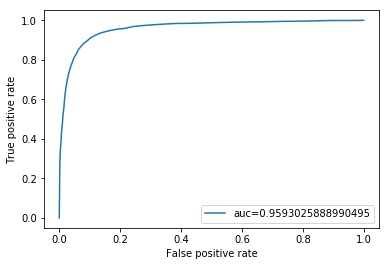

In [66]:
# .959 auc
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [93]:
# now I'll do the other dataset
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled_resampled, y_train_scaled_resampled)
score = clf.predict_proba(X_test_scaled)[:,1]
auc = roc_auc_score(y_test_scaled, score)
print(auc)

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9642807199917183


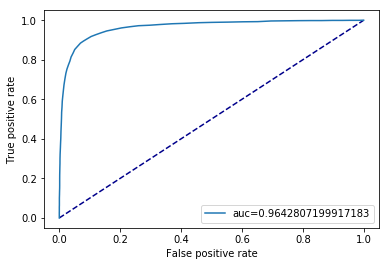

In [86]:
# 0.964 auc
# better than unscaled
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test_scaled, y_pred_proba)
auc = roc_auc_score(y_test_scaled, y_pred_proba)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

Well the baselines are done, at .959 and .964 (rounded) for the unscaled and scaled dataframes, respectively. That's a really good baseline. I might use them instead in my final models, with some tuning.

I had encountered an issue I discovered from my previous work. Last time, I used predict instead of predict_proba for the probabilities that I fed into the roc_auc_score function. I used this for the Random Forest and Logistic Regression CV last time, and they scored much worse than the XGBoost and Neural Network. Nowadays I know I made a serious mistake. roc_auc_score wants the probabilities for the positive class, in a range from 0 to 1. predict only gives a binary 0 or 1, and is used for accuracy calcations, not ROC AUC calculations, and doesn't work right in the roc_auc_score function. Last time my baseline and regression models were scored low in error, and I didn't even notice. Not this time!

Onto Logistic Regression.

In [126]:
# 10 folds, refit=True for best result out of 10 cross validations
# had to bump max_iter from 100 because it failed to converge. tested multiple, 1000 works. no effect on auc
# I'm bumping up to 3000 to make it in line with the other model, which doesn't work at 1000

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', #l1, l2, elasticnet - lasso, ridge, and in between
                         C=1.0,   #float, smaller is stronger regularization
                         solver='lbfgs', #multiple choices here
                         max_iter=3000, #need to worry about convergence with this data
                         random_state=42)

#ive already balanced using SMOTE so I'm not using class weight

clf.fit(X_train_scaled_resampled, y_train_scaled_resampled)
train_predictions = clf.predict_proba(X_test_scaled)[:,1]
auc = roc_auc_score(y_test_scaled, train_predictions)
print(auc)

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8913321054538553


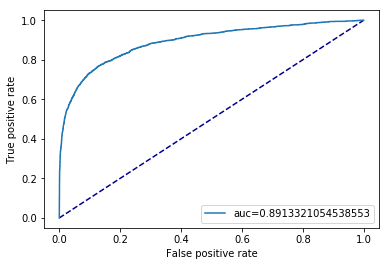

In [127]:
# 0.8913321054538553 AUC scaled with 12, c=1.0, solver=lbfgs, max_iter=3000
#graph ROC AUC curve
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test_scaled, y_pred_proba)
auc = roc_auc_score(y_test_scaled, y_pred_proba)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [129]:
#now unscaled dataset
#doesnt work at 1000, works at 3000 after some testing
clf = LogisticRegression(penalty='l2', #l1, l2, elasticnet - lasso, ridge, and in between
                         C=1.0,   #float, smaller is stronger regularization
                         solver='lbfgs', #multiple choices here
                         max_iter=3000, #need to worry about convergence with this data
                         random_state=42)

clf.fit(X_train_resampled, y_train_resampled)
train_predictions = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, train_predictions)
print(auc)

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8975630186856225


/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


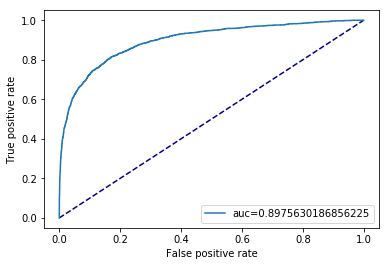

In [130]:
# .8975630186856225  AUC unscaled. its better than scaled
#graph ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, train_predictions)
auc = roc_auc_score(y_test, train_predictions)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

I want to try getting the Logistic Regression score improved, but I also want to baseline it against the original data. I'm gonna run it against the unscaled, un-SMOTEd data to see how much improvement my feature engineering did.

In [147]:
#using df3, i have X_train and y_train already
clf = LogisticRegression(penalty='l2', #l1, l2, elasticnet - lasso, ridge, and in between
                         C=0.01,   #float, smaller is stronger regularization
                         solver='lbfgs', #multiple choices here, gonna try several
                         max_iter=5000, #need to worry about convergence with this data
                         random_state=42)

#failed to converge at 3000 with lbfgs

clf.fit(X_train, y_train)
orig_predictions = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, orig_predictions)
print(auc)

0.9143259027933539


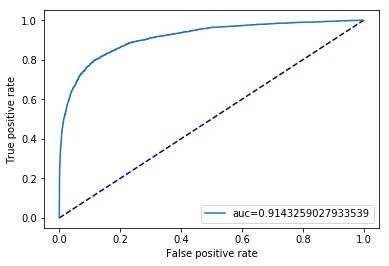

In [148]:
# 0.9143259027933539 auc with l2, c=0.01, lbfgs, max_iter 5000
# this is the best of the logistic regressions, im gonna tweak it
# not breaking .914
#now to graph it
fpr, tpr, _ = roc_curve(y_test, orig_predictions)
auc = roc_auc_score(y_test, orig_predictions)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [156]:
#since random forest with scaled data did so well, i'm going to hyperparameter tweak that as well
#random forest and XGBoost are similar, so I don't know that presenting the same kind of algorithm is great
#but i'm results-oriented, and those have the best results

clf = RandomForestClassifier(n_estimators=1000, #number of trees in forest
                             max_depth=None, #how deep it goes, none is all pure. this is like XGBoost's thing
                             min_samples_split=2, #min number of samples to split node
                             min_samples_leaf=2, #min samples in every leaf node
                             max_features='auto', #number of features to consider for each split
                             max_leaf_nodes=None, #trees with this number max leaf nodes, none is unlimited
                             min_impurity_decrease=0, #split node with impurity decrease greater than this
                             bootstrap=True, #whether to bootstrap or use the whole dataset for each tree
                             random_state=42)
clf.fit(X_train_scaled_resampled, y_train_scaled_resampled)
score = clf.predict_proba(X_test_scaled)[:,1]
auc = roc_auc_score(y_test_scaled, score)
print(auc)

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9707542400662538


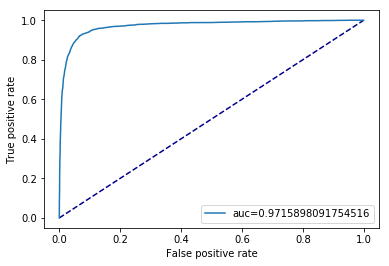

In [155]:
# 0.9716 auc with              
#                             n_estimators=1000, 
#                             max_depth=None, 
#                             min_samples_split=2, 
#                             min_samples_leaf=1, 
#                             max_features='auto', 
#                             max_leaf_nodes=None, 
#                             min_impurity_decrease=0, 
#                             bootstrap=True

#with no tweaking, the baseline was .964
#an improvement
fpr, tpr, _ = roc_curve(y_test_scaled, score)
auc = roc_auc_score(y_test_scaled, score)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [159]:
#I'm gonna try a randomized search now
#I don't have the time or computer power for a GridSearch, but I would after this randomized search step if I could
#however, research shows that even a small random search can narrow down to a "near-optimal" result quickly
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 130, num = 13)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [160]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled_resampled, y_train_scaled_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 33.9min finished
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [161]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 763}

In [162]:
#best random model?
model = RandomForestClassifier(n_estimators=763, #number of trees in forest
                             max_depth=20, #how deep it goes, none is all pure. this is like XGBoost's thing
                             min_samples_split=5, #min number of samples to split node
                             min_samples_leaf=4, #min samples in every leaf node
                             max_features='sqrt', #number of features to consider for each split
                             max_leaf_nodes=None, #trees with this number max leaf nodes, none is unlimited
                             min_impurity_decrease=0, #split node with impurity decrease greater than this
                             bootstrap=False, #whether to bootstrap or use the whole dataset for each tree
                             random_state=42)
model.fit(X_train_scaled_resampled, y_train_scaled_resampled)
mscore = model.predict_proba(X_test_scaled)[:,1]
auc = roc_auc_score(y_test_scaled, mscore)
print(auc)

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9736919201504511


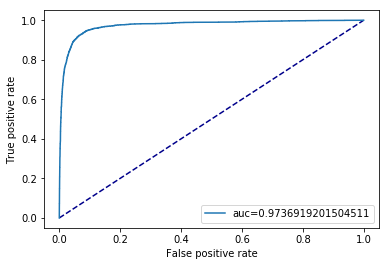

In [163]:
#0.9736919201504511 auc with random params
#I'm worried about overfitting
#but it didn't increase much, and I'm running out of time, so I'm gonna guess i'm not gonna break .98
#time to graph it
fpr, tpr, _ = roc_curve(y_test_scaled, mscore)
auc = roc_auc_score(y_test_scaled, mscore)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

It looks like the unscaled, un-SMOTEd data outperformed the others at logistic regression. The assumptions for logistic regression are that there is a binary dependent variable, the variables are independent, that there is no multicollinearity in the data, linearity of independent variables and log odds, and that there is a large sample size. That's all true in this case, and none of that shows concern for scaling or class imbalance. 

The assumptions for random forest are that the sample is representative (no class imbalance), and recent research shows that they should also not be multicollinear. I had planned to use this model, so SMOTE was important. Still, I demonstrated my skill in doing all the work, and learned something new by reading that paper. The decision tree outperformed the logistic regression by a fair amount. Since the random forest outperforms the Logistic Regression, even with tuning, I'll present that and XGBoost.

We'll see how the XGBoost model performs next. XGBoost values regularization, of which there are many types built into the model, but it should also benefit from scaling. I'm going to use the model I used last time, to see how it performs now. Then I'll build a new model and work on hyperparameter tuning.

In [167]:
#default XGBoost first
#XGboost defaults:
#max_depth=3
#learning_rate=0.1
#n_estimators=100
#silent=True
#objective='binary:logistic'
#booster='gbtree'
#n_jobs=1
#nthread=None
#gamma=0
#min_child_weight=1
#max_delta_step=0
#subsample=1
#colsample_bytree=1
#colsample_bylevel=1
#reg_alpha=0
#reg_lambda=1
#scale_pos_weight=1
#base_score=0.5
#random_state=0
#seed=None
#missing=None
from xgboost import XGBClassifier

#have to convert to numpy arrays to get this to work
x_test = X_test_scaled.as_matrix()
x_train = X_train_scaled_resampled.as_matrix()

model2 = XGBClassifier()
model2.fit(x_train, y_train_scaled_resampled)

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [168]:
y_preds = model2.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test_scaled, y_preds)
print(auc)

0.9310192118566574


In [110]:
#.93 isn't great, but that's the XGBoost default to work from
#last time's model
#XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bytree=0.8, gamma=0, learning_rate=0.1,
#              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
#              n_estimators=3000, n_jobs=1, nthread=None,
#              objective='binary:logistic', random_state=0, reg_alpha=0.02,
#              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
#              subsample=1.0)


In [170]:
#run last time's model
model2 = XGBClassifier(max_depth=4,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=3000,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1.0,
                           colsample_bytree=0.8,
                           colsample_bylevel=1,
                           reg_alpha=0.02,
                           reg_lambda=1,
                           scale_pos_weight=1,
                           seed=None,
                           missing=None)
model2.fit(x_train, y_train_scaled_resampled)

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=3000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0.02,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1.0)

In [171]:
xg_pred = model2.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test_scaled, xg_pred)
print(auc)

0.9884767680601805


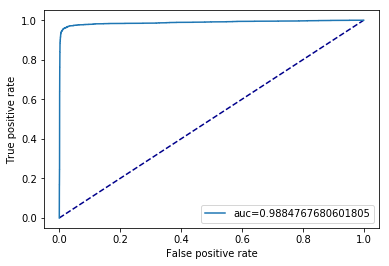

In [172]:
#time to graph it
fpr, tpr, _ = roc_curve(y_test_scaled, xg_pred)
auc = roc_auc_score(y_test_scaled, xg_pred)

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Conclusion and Test Results

With the models done, now it's time to bring in the test dataset and output the files to submit. Then do the writeup.

I'm going to present the Random Forest Classifier and XGBoost Classifier. I considered running a randomized search on the XGBoost as well, but last time I did a GridSearchCV to get these values, so it seems redundant. Now they may not be optimal, because the datasets aren't the same, but I do realize the dataset IS very similar to the one I had last time. Like the highest correlation is between the same two features at .38, the columns are numbered the same, etc. I didn't dig into exactly how similar they are, because I wanted to give this its own genuine effort. I think the biggest difference is class imbalance, because it came up during the phone interview how last time they were balanced, and I was asked what I'd do. Well, now you've seen what I'd do in this situation: KMeansSMOTE.

In any case, the ROC AUC scores I have are high, and I'm proud of them. The Random Forest Classifier comes in at .974, and the XGBoost comes in at .988 for the test data. I should mention, even using last time's values, the ROC AUC is several percent higher, and actually beat the CNN I did last time. This is the best score yet.

In [173]:
#read in the test data
df = pd.read_csv("/Users/Ryan/Desktop/Programming/State Farm/Round 2/exercise_04_test.csv")

#check header
df.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.196063,3.683995,-3.265963,7.982156,-2.638979,-0.798760,-3.345929,1.266333,-9.689859,1.512794,10.782491,-2.150111,-3.440034,-1.457826,-4.622802,12.122639,8.332386,1.826703,39.021954,59.039416,28.052540,-5.832973,7.056600,-7.295188,8.598802,5.382334,6.657179,-39.510478,-8.266307,-2.933167,1.787434,-5.970090,-9.005652,28.979959,tesla,thurday,-4.664154,-3.387188,-1.027278,0.247112,-16.882003,$124.72,111.298084,57.180492,39.960587,-0.01%,14.360555,-4.145888,-1.958714,11.650252,6.244322,-17.123892,9.584296,24.693895,-4.911716,3.764528,35.965596,2.775754,-1.565157,-1.481567,9.096912,1.402478,2.921227,66.616486,1.020819,1.647317,-0.705683,2.371254,Jun,61.081386,-3.965965,-5.868383,-64.917097,10.330911,-30.803107,32.061773,1.864712,0.290819,-19.932222,0.304433,25.641645,0.310129,-2.200959,-39.591599,-11.072770,-6.354171,-2.690060,-0.625545,-0.170003,0.603383,71.588700,14.065825,-3.061930,asia,0.023357,6.021137,-2.423546,-1.182148,1.514047,3.775888
1,23.155197,-9.226725,6.179996,-29.612592,-11.146301,-11.858857,-3.588747,-0.928037,-9.924414,0.932668,10.703057,-1.256140,-0.836081,18.783275,2.234836,-1.701478,-5.912640,3.575587,1.066283,10.885112,14.209537,-7.733139,-37.595315,-1.777952,-2.936241,24.855811,-10.885966,12.273197,-1.955948,1.828896,1.344078,7.916562,-4.924726,-64.373083,Toyota,thur,5.220242,-8.056885,-0.119727,2.243721,-24.466256,$1273.04,-344.662344,-3.488549,-51.841789,-0.01%,0.328324,17.731267,-5.142258,17.981971,7.713429,-27.772762,0.235355,-51.696537,1.197316,-10.476814,25.822497,-19.361989,-1.557613,-1.561275,-1.202711,-5.061362,2.942283,14.039985,-1.804351,4.507479,-1.960629,-0.103773,July,142.344671,88.403461,-27.927591,-64.341235,-14.725451,38.522559,35.660237,4.438207,-7.733078,3.487243,4.310639,4.153527,-0.056919,-6.559458,-5.632954,4.601376,-7.564547,0.574087,0.339102,-0.575026,0.484996,22.600000,-13.743287,-3.408293,asia,1.349389,19.646176,13.871395,38.657216,5.395564,3.139697
2,-13.969618,-0.343978,1.920740,-1.983859,-18.619658,-4.929527,-0.669704,1.906140,-17.125858,1.112156,22.950872,-1.279778,0.502783,10.260698,-9.837024,-3.173681,-5.908193,-3.899170,17.075960,23.608650,21.677178,-7.896578,15.138796,21.175041,1.636526,6.274977,6.527941,43.761127,2.844375,1.630418,-1.188786,0.696051,0.957865,-12.868044,bmw,wednesday,-0.061424,-0.597080,-2.433321,3.163022,-17.436252,$-1651.19,110.653770,-14.892717,-18.185331,0.0%,3.824882,26.283217,18.123959,-19.111332,-3.852264,-79.035636,-2.926985,-26.788330,-7.268831,-3.035959,-32.080811,-16.641625,1.384271,-2.243955,3.003340,2.888462,-6.571692,12.275393,0.975154,-3.013884,-1.026140,1.255628,Aug,21.878155,-37.326974,23.508893,-1.551562,-8.641403,-11.315678,-27.609008,-15.320348,-20.485863,-8.168095,-2.789520,-15.499018,2.341947,-2.357149,-38.235204,17.351746,-4.523314,1.554523,-3.585523,-0.519074,2.343231,-141.012215,6.507336,8.900449,asia,2.149993,22.719042,-2.958959,-36.135939,5.520687,3.733732
3,49.722481,-1.500789,-1.564326,-8.113622,9.696716,-21.883567,-0.737723,4.043544,-11.514792,-1.797036,0.046501,1.145335,-0.656622,3.561443,7.979791,-12.359490,-3.681145,4.916650,20.762549,29.188727,1.542363,4.320959,5.872899,0.173012,-0.375434,-3.336687,6.029404,49.326936,0.573649,0.327485,-1.129571,-3.752924,3.973483,7.753456,Toyota,wed,1.908461,-9.352973,-5.576547,3.122171,1.242982,$896.05,24.377568,47.137845,-9.024350,0.01%,-6.201024,-8.221240,-2.571185,38.009976,-9.397150,-10.271536,-3.495210,45.918938,-1.940477,5.436504,36.041199,-8.626472,2.204213,0.585810,-5.135804,3.617203,2.806983,31.788347,-2.308893,3.770616,0.675152,-0.424119,Aug,17.250002,-40.739599,62.329632,-39.633620,13.358425,-7

In [174]:
#convert the two with strings
df.loc[:,'x41'] = df.loc[:,'x41'].str.replace('$','').astype(float)
df.loc[:,'x45'] = df.loc[:,'x45'].str.rstrip('%').astype(float) / 100.0

In [175]:
#days of the week
df.x35.replace(['wed','thur','fri','thurday'],['wednesday','thursday','friday','thursday'], inplace=True)

In [176]:
#text fixes
df.x93.replace(['euorpe'],['europe'], inplace=True)
df.x68.replace(['sept.', 'Dev', 'January', 'July'],['Sep', 'Dec', 'Jan', 'Jul'], inplace=True)

In [177]:
#time to one hot encode x34, x35, x68, x93
X = df[['x34','x35','x68','x93']]

#make the variables categorical
X['x34'] = pd.Categorical(X['x34'])
X['x35'] = pd.Categorical(X['x35'])
X['x68'] = pd.Categorical(X['x68'])
X['x93'] = pd.Categorical(X['x93'])

#one hot encode them
#im organizing it this way to make sure i get them all correctly
#x41 and x45 dont need this
dfDummies1 = pd.get_dummies(X['x93'], prefix = 'region')
dfDummies2 = pd.get_dummies(X['x68'], prefix = 'month')
dfDummies3 = pd.get_dummies(X['x35'], prefix = 'day')
dfDummies4 = pd.get_dummies(X['x34'], prefix = 'make')

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [178]:
#add the columns to the dataframe 
df = pd.concat([df, dfDummies1], axis=1)
df = pd.concat([df, dfDummies2], axis=1)
df = pd.concat([df, dfDummies3], axis=1)
df = pd.concat([df, dfDummies4], axis=1)

In [179]:
#check to make it all went through
df.describe(include = 'all')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,region_america,region_asia,region_europe,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_friday,day_monday,day_thursday,day_tuesday,day_wednesday,make_Honda,make_Toyota,make_bmw,make_chevrolet,make_chrystler,make_ford,make_mercades,make_nissan,make_tesla,make_volkswagon
count,9997.000000,9999.000000,9998.000000,9996.000000,10000.000000,10000.000000,9996.000000,9999.000000,9997.000000,9999.000000,9999.000000,9997.000000,10000.000000,9994.000000,9998.000000,9997.000000,9998.000000,9997.000000,9998.000000,9998.000000,9998.000000,10000.000000,10000.000000,9997.000000,9996.000000,9997.000000,9998.000000,9995.000000,9997.000000,9999.000000,10000.000000,9997.000000,9999.000000,9997.000000,9999,9998,9997.000000,9999.000000,9999.000000,9998.000000,10000.000000,10000.000000,9998.000000,10000.000000,9999.000000,9.998000e+03,9999.000000,9999.000000,9994.000000,9997.000000,10000.000000,9998.000000,9999.000000,9999.000000,10000.000000,9999.000000,9999.000000,9997.000000,9998.000000,9997.000000,9997.000000,9997.000000,9996.000000,9998.000000,10000.000000,9998.000000,9998.000000,9996.000000,10000,9997.000000,9998.000000,9999.000000,10000.000000,9995.000000,9997.000000,9998.000000,10000.000000,9995.000000,9999.000000,9997.000000,9998.000000,9998.000000,9997.000000,9999.000000,10000.000000,9997.000000,9997.000000,9998.000000,9998.000000,9998.000000,9997.000000,10000.000000,10000.000000,9999,9998.000000,9999.000000,9998.000000,9996.000000,9998.000000,9995.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,volkswagon,wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3132,5198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.238671,-3.905121,0.215595,-1.966943,0.491107,-0.636653,-0.037581,-0.003744,-2.716956,

In [181]:
#copy and drop, better safe than sorry
df2 = df.copy()
df2.drop(['x34','x35','x68','x93'], axis=1, inplace=True)
columns2 = df2.columns
index2 = df2.index

In [182]:
#there are missing values, I'll have to impute them again
#create imputer object
imputer = SimpleImputer(strategy = 'mean', copy=False)

#fit and transform it, in place, and keep column names and index
df2 = pd.DataFrame(imputer.fit_transform(df2), columns=columns2, index=index2)

In [183]:
df2.describe(include = 'all')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,region_america,region_asia,region_europe,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_friday,day_monday,day_thursday,day_tuesday,day_wednesday,make_Honda,make_Toyota,make_bmw,make_chevrolet,make_chrystler,make_ford,make_mercades,make_nissan,make_tesla,make_volkswagon
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,6.238671,-3.905121,0.215595,-1.966943,0.491107,-0.636653,-0.037581,-0.003744,-2.716956,-0.022039,5.323148,0.003463,-0.423744,0.067399,0.083820,0.234117,-0.053312,0.066433,6.879759,-0.225561,5.498540,1.313958,-1.040795,-0.057157,0.186227,0.345749,-0.054225,7.037502,-0.058597,0.038426,-0.029893,0.099059,-0.049170,-6.713782,0.001948,1.417427,-0.024424,0.061802,0.829119,3.586368,-1.679835,0.263703,-21.485087,-1.700340e-07,0.031753,0.255644,0.024619,-0.129270,1.231067,-5.058600,0.003912,0.013869,-0.045390,0.048089,-1.645390,-0.055116,-0.437366,-0.096837,-0.117899,-0.038403,0.035298,-5.021954,0.005439,0.080165,-0.158710,-0.038236,-9.871128,6.194526,0.928429,-6.879533,-3.042467,0.536305,4.388485,0.081213,-0.281942,-2.536327,0.135363,-0.120389,0.006994,0.083632,0.877067,0.126616,-0.912008,0.043840,0.048804,-0.000554,0.038976,-8.910846,0.152958,0.011176,-0.035996,-0.314463,-0.443604,-4.492784,0.010056,0.135743,0.078300,0.885000,0.036600,0.041300,0.206000,0.000500,0.001000,0.0001,0.270900,0.235700,0.011600,0.114400,0.002700,0.02460,0.091200,0.013700,0.001500,0.443400,0.021400,0.519800,0.127700,0.277300,0.18380,0.000300,0.029100,0.003900,0.00110,0.009000,0.054500,0.313200
std,29.010137,17.040604,5.249871,36.382298,20.945442,13.861451,4.107646,2.416886,13.460683,2.467481,27.989720,1.528761,1.711094,8.526410,8.476450,9.832215,8.753008,7.443306,26.948677,31.798400,27.985093,7.446860,18.608227,8.815209,6.981289,22.756978,9.614583,31.521952,5.658889,1.736410,1.515437,4.383182,5.302082,37.167419,3.973145,9.594644,4.677187,6.231427,17.579076,1006.344016,130.715638,38.301712,89.284672,1.040003e-04,6.081759,14.637006,8.003771,

In [186]:
farm_test = df2.copy()

In [187]:
#transformations and data cleaning done
#do model 1 - Random Forest Classifier
probs2 = model.predict_proba(farm_test)[:,1]

In [189]:
#save to file
np.savetxt("/Users/Ryan/Desktop/Programming/State Farm/Round 2/results1.csv", probs2, delimiter=",")

In [190]:
#convert to matrix 
farm_test2 = farm_test.as_matrix()

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [191]:
#do model 2 -
probs3 = model2.predict_proba(farm_test2)[:,1]

In [192]:
#save to file
np.savetxt("/Users/Ryan/Desktop/Programming/State Farm/Round 2/results2.csv", probs3, delimiter=",")

And I'm done. :)